# LGN, TLC y EVT

La **Ley de los Grandes Números** es uno de los pocos resultados matemáticos que garantiza que una **base de datos**, obtenida a partir de observaciones aleatorias, puede ser una buena aproximación a un resultado general.

A su vez, el **Teorema del Límite Central** nos dice que aunque las variables originales no sean normales, sus sumas y promedios sí tienden a seguir una distribución normal, a medida que aumentamos el tamaño de la muestra.

Finalmente, exploraremos la **Teoría de Valores Extremos (Extreme Value Theory)**, una herramienta útil cuando la hipótesis de varianza finita no se cumple.

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Podemos utilizar numpy para simular distribuciones...
import numpy as np

# ... o scipy.
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import kurtosis

import pandas as pd
import json

## La ley de los grandes números (LGN)

La Ley de los Grandes Números nos dice que el **promedio empírico** de una secuencia de variables aleatorias i.i.d., con media finita, converge al **promedio teórico**:

$$
\frac{X_1 + X_2 + \cdots + X_N}{N} \;\; \longrightarrow \;\; \mathbb{E}[X_i] \quad \text{cuando } N \to \infty
$$


In [162]:
# Ejemplo con la distribución de Poisson
#                       X ~ Poi(λ)
# Esta distribución sirve para modelar conteos de eventos

lam = 5  # tasa de ocurrencia de eventos
print("Parámetro teórico λ =", lam)

# La media teórica de una variable Poisson es igual a λ
media_teorica = lam
print("Media teórica de la distribución =", media_teorica)

# Consigamos n muestras y calculemos el promedio empírico
n_list = [10, 50, 100, 500, 50_000]

for n in n_list:
    X = np.random.poisson(lam=lam, size=n)
    media_muestral = np.sum(X) / n
    print(f"\n\tPara n={n}, la media muestral simulada fue: {media_muestral:.2f} (diferencia de {abs(media_teorica - media_muestral):.2f})")


Parámetro teórico λ = 5
Media teórica de la distribución = 5

	Para n=10, la media muestral simulada fue: 5.40 (diferencia de 0.40)

	Para n=50, la media muestral simulada fue: 5.24 (diferencia de 0.24)

	Para n=100, la media muestral simulada fue: 5.12 (diferencia de 0.12)

	Para n=500, la media muestral simulada fue: 4.96 (diferencia de 0.04)

	Para n=50000, la media muestral simulada fue: 5.01 (diferencia de 0.01)


In [163]:
# Ejemplo con la distribución Uniforme
#                       X ~ U(a, b)
# Esta distribución sirve para modelar fenómenos equiprobables

a = 0   # límite inferior
b = 1   # límite superior
print("Parámetros teóricos a =", a, ", b =", b)

# La media teórica de una variable Uniforme es (a + b) / 2
media_teorica = (a + b) / 2
print("Media teórica de la distribución =", media_teorica)

n_list = [10, 50, 100, 500, 50_000]

for n in n_list:
    X = np.random.uniform(low=a, high=b, size=n)
    media_muestral = np.sum(X) / n
    print(f"\n\tPara n={n}, la media muestral simulada fue: {media_muestral:.2f} (diferencia de {abs(media_teorica - media_muestral):.2f})")


Parámetros teóricos a = 0 , b = 1
Media teórica de la distribución = 0.5

	Para n=10, la media muestral simulada fue: 0.57 (diferencia de 0.07)

	Para n=50, la media muestral simulada fue: 0.49 (diferencia de 0.01)

	Para n=100, la media muestral simulada fue: 0.51 (diferencia de 0.01)

	Para n=500, la media muestral simulada fue: 0.50 (diferencia de 0.00)

	Para n=50000, la media muestral simulada fue: 0.50 (diferencia de 0.00)


In [164]:
# Ejemplo 1 con la distribución Pareto (α > 1, media finita)
#                       X ~ Pareto(α, x_m)
# Esta distribución sirve para modelar fenómenos tipo 80:20 (colas pesadas)

alpha = 2  # parámetro de forma
x_m = 1      # valor mínimo posible
print("Parámetros teóricos α =", alpha, ", x_m =", x_m)

# La media teórica de una variable Pareto es (α * x_m) / (α - 1), solo si α > 1
media_teorica = (alpha * x_m) / (alpha - 1)
print("Media teórica de la distribución =", media_teorica)

n_list = [10, 50, 100, 500, 50_000]

for n in n_list:
    X = (np.random.pareto(a=alpha, size=n) + 1) * x_m  # ajustamos pues numpy hace x_m = 1 por defecto
    media_muestral = np.sum(X) / n
    print(f"\n\tPara n={n}, la media muestral simulada fue: {media_muestral:.2f} (diferencia de {abs(media_teorica - media_muestral):.2f})")


Parámetros teóricos α = 2 , x_m = 1
Media teórica de la distribución = 2.0

	Para n=10, la media muestral simulada fue: 1.57 (diferencia de 0.43)

	Para n=50, la media muestral simulada fue: 2.07 (diferencia de 0.07)

	Para n=100, la media muestral simulada fue: 2.24 (diferencia de 0.24)

	Para n=500, la media muestral simulada fue: 1.95 (diferencia de 0.05)

	Para n=50000, la media muestral simulada fue: 1.99 (diferencia de 0.01)


In [173]:
# Ejemplo 2 con la distribución Pareto (α < 1, media infinita)

alpha = .5  # parámetro de forma
x_m = 1      # valor mínimo posible
print("Parámetros teóricos α =", alpha, ", x_m =", x_m)

media_teorica = (alpha * x_m) / (alpha - 1)
print("Media teórica de la distribución =", media_teorica)

n_list = [10, 50, 100, 500, 50_000]

for n in n_list:
    X = (np.random.pareto(a=alpha, size=n) + 1) * x_m
    media_muestral = np.sum(X) / n
    print(f"\n\tPara n={n}, la media muestral simulada fue: {media_muestral:.2f} (diferencia de {abs(media_teorica - media_muestral):.2f})")


Parámetros teóricos α = 0.5 , x_m = 1
Media teórica de la distribución = -1.0

	Para n=10, la media muestral simulada fue: 37.64 (diferencia de 38.64)

	Para n=50, la media muestral simulada fue: 96.34 (diferencia de 97.34)

	Para n=100, la media muestral simulada fue: 53.52 (diferencia de 54.52)

	Para n=500, la media muestral simulada fue: 38765000.05 (diferencia de 38765001.05)

	Para n=50000, la media muestral simulada fue: 37560.90 (diferencia de 37561.90)


**Comentario:**

Existen dos tipos de ley de los grandes números: **débil** y **fuerte**, dependiendo del tipo de convergencia usado.  
La ley débil utiliza convergencia en probabilidad, mientras que la ley fuerte utiliza convergencia casi segura.

Convergencia en probabilidad:  
$$
X_n \xrightarrow{P} X \quad\iff\quad \forall \,\varepsilon > 0,\; \lim_{n\to\infty} P(|X_n - X| > \varepsilon) = 0
$$

Convergencia casi segura:  
$$
X_n \xrightarrow{\text{c.s.}} X \quad\iff\quad P\left( \lim_{n\to\infty} X_n = X \right) = 1
$$

Más en: https://en.wikipedia.org/wiki/Convergence_of_random_variables


<img src="./Convergence_in_distribution_(sum_of_uniform_rvs).gif">

In [7]:
# Ejemplo con la distribución Bernoulli
#                       X ~ Bern(p)
# Esta distribución sirve para modelar eventos binarios (éxito/fracaso)

p = 0.5  # probabilidad de éxito
print("Parámetro teórico p =", p)

# La media teórica de una variable Bernoulli es igual a p
media_teorica = p
print("Media teórica de la distribución =", media_teorica)

# Consigamos n muestras y calculemos el promedio empírico
n_list = [10, 50, 100, 500, 50_000]

for n in n_list:
    X = np.random.binomial(n=1, p=p, size=n)
    media_muestral = np.sum(X) / n
    print(f"\n\tPara n={n}, la media muestral simulada fue: {media_muestral:.2f} (diferencia de {abs(media_teorica - media_muestral):.2f})")


Parámetro teórico p = 0.5
Media teórica de la distribución = 0.5

	Para n=10, la media muestral simulada fue: 0.60 (diferencia de 0.10)

	Para n=50, la media muestral simulada fue: 0.54 (diferencia de 0.04)

	Para n=100, la media muestral simulada fue: 0.55 (diferencia de 0.05)

	Para n=500, la media muestral simulada fue: 0.56 (diferencia de 0.06)

	Para n=50000, la media muestral simulada fue: 0.50 (diferencia de 0.00)


**Comentario**

Para $X \sim \text{Bern}(p)$, por definición:

$$
P(X=1) = p
$$

Por la Ley de los Grandes Números:

$$
\overline{X} \;\longrightarrow\; \mathbb{E}[X] = p \quad \text{cuando } n \to \infty.
$$

En otras, palabras:
$$
\overline{X} \;\longrightarrow\; P(X=1)
$$





## El teorema del límite central (TLC)

El **Teorema del Límite Central** establece que, bajo ciertas condiciones, la suma o promedio de un gran número de variables aleatorias independientes e idénticamente distribuidas se aproxima a una **distribución normal**, sin importar la distribución original de las variables.

Sean $ X_1, X_2, \dots, X_n$ i.i.d. con media $\mu = \mathbb{E}[X_i]$ y varianza $\sigma^2 = \text{Var}(X_i) < \infty$. Definimos la suma estandarizada:

$$
S_n = \frac{\sum_{i=1}^{n} X_i - n\mu}{\sigma \sqrt{n}}
$$

El TLC dice que cuando $n \to \infty$:

$$
S_n \;\;\xrightarrow{d}\;\; \mathcal{N}(0,1)
$$

Este teorema es crucial porque permite usar la distribución normal para aproximar sumas de variables aleatorias, incluso cuando estas no siguen una distribución normal.

Promedios de las muestras: [0.53967128 0.41590875 0.54127681 ... 0.50911333 0.47312064 0.56214556]


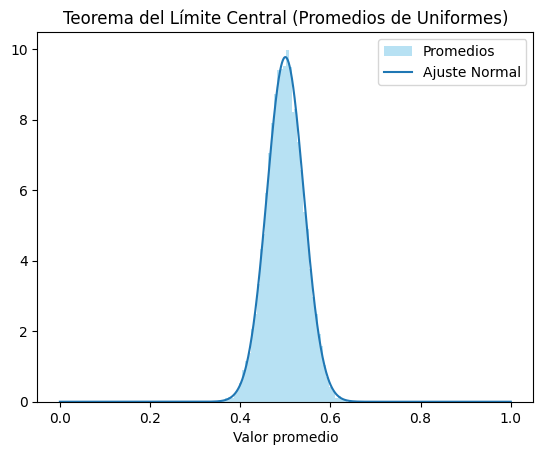

In [174]:
# TLC para suma de uniformes

# Generamos 10,000 muestras aleatorias de tamaño 50 de una distribución uniforme [0, 1]
n_samples = 10_000
sample_size = 50
uniform_samples = uniform.rvs(size=(n_samples, sample_size))

# Calculamos los promedios de cada conjunto de muestras
sample_means = uniform_samples.mean(axis=1)
print('Promedios de las muestras:',sample_means)

# Graficamos los promedios y comparamos contra una distribución normal
x = np.linspace(0, 1, 1000)
normal_fit = norm.pdf(x, loc=0.5, scale=1 / (12 * sample_size)**0.5)  # Parámetros teóricos

plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='skyblue', label="Promedios")
plt.plot(x, normal_fit, label="Ajuste Normal")
plt.title("Teorema del Límite Central (Promedios de Uniformes)")
plt.xlabel("Valor promedio")
plt.legend()
plt.show()

<img src="./IllustrationCentralTheorem.png">

In [176]:
# TLC en un dataset real
from sklearn.datasets import fetch_california_housing

# Supongamos que este dataset es toda nuestra población
data = fetch_california_housing(as_frame=True).frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [177]:
# Seleccionamos una variable en la cual concentrarnos
variable = 'MedInc'
values = data[variable].values
print(f"Media 'teórica' de {variable}: ", values.mean())

Media 'teórica' de MedInc:  3.8706710029069766


In [179]:
# Particionemos en muestras de tamaño 300
sample_size = 300

# Número de submuestras que podemos extraer (floor division)
num_samples = len(values) // sample_size

# Dividimos la columna en muestras de tamaño 50
samples = np.array_split(values[:num_samples*sample_size], num_samples)

print(f"Número de muestras de tamaño {sample_size}: {len(samples)}")
print(f"\nPrimeras 5 medias muestrales:", [np.mean(s) for s in samples[:5]])

Número de muestras de tamaño 300: 68

Primeras 5 medias muestrales: [3.1752266666666666, 3.7895543333333337, 4.004885333333333, 3.630898666666667, 3.862944333333334]


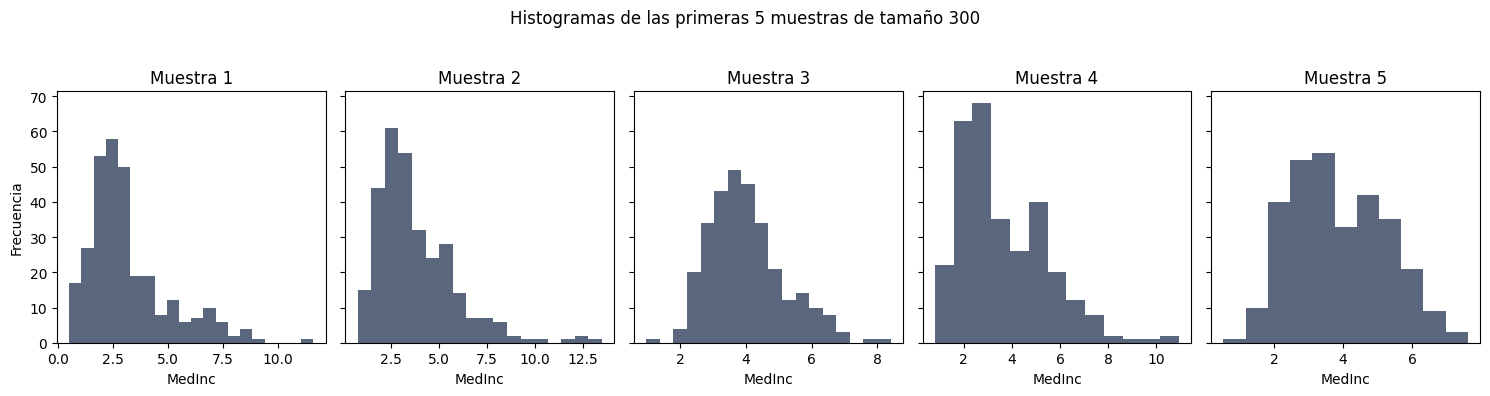

In [180]:
num_to_plot = 5
fig, axes = plt.subplots(1, num_to_plot, figsize=(15, 4), sharey=True)

for i, sample in enumerate(samples[:num_to_plot]):
    axes[i].hist(sample, bins='fd', color='#5A677D')
    axes[i].set_title(f"Muestra {i+1}")
    axes[i].set_xlabel(variable)
    if i == 0:
        axes[i].set_ylabel("Frecuencia")

plt.suptitle(f"Histogramas de las primeras {num_to_plot} muestras de tamaño {sample_size}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

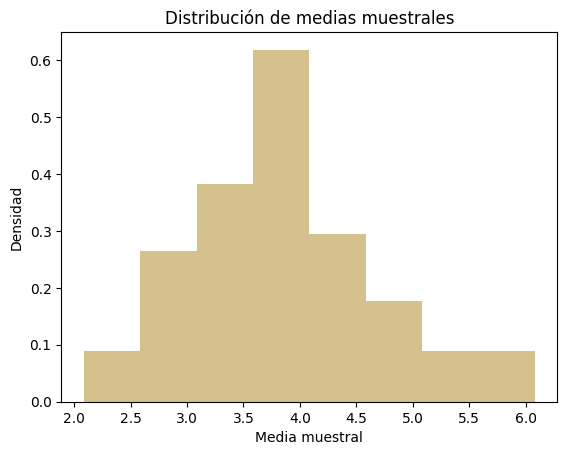

In [181]:
sample_means = np.array([np.mean(s) for s in samples])
plt.hist(sample_means, bins='fd', density=True, color='#D5C18B')
plt.title(f"Distribución de medias muestrales")
plt.xlabel("Media muestral")
plt.ylabel("Densidad")
plt.show()

# ¿Utilidad práctica?

La LGN y el TLC proporcionan la base teórica para inferir **propiedades poblacionales** a partir de **muestras**.

*LGN*

- **Encuestas de opinión o sondeos electorales:** si tomamos una muestra representativa grande de la población, la proporción de respuestas observadas se aproxima al valor real de toda la población.
- **Bases de datos financieras:** al calcular la media de rendimientos diarios de un activo a partir de muchas observaciones, podemos aproximar el rendimiento esperado del activo.
- **Control de calidad:** al medir defectos en una línea de producción con suficientes unidades muestreadas, la proporción de defectuosos converge al verdadero porcentaje de defectos.

La LGN justifica el uso de **estadísticos muestrales como estimadores consistentes**, porque sabemos que con más datos nos acercamos al parámetro poblacional.

---

*TLC*

- **Intervalos de confianza y pruebas de hipótesis:** al calcular la media de una muestra grande, podemos usar la aproximación normal para construir intervalos de confianza o realizar tests.
- **Machine learning:** al sumar errores o gradientes en algoritmos estocásticos, la distribución de esos promedios tiende a normal, facilitando el análisis y ajuste de parámetros.

El TLC respalda la **aplicación de técnicas paramétricas** basadas en normalidad, incluso cuando la población original no es normal, siempre que la muestra sea suficientemente grande.

# TLC generalizado

Cuando no hay varianza finita, está el **Teorema del Límite Central Generalizado** que establece que la suma normalizada de variables i.i.d converge en distribución a una **distribución estable** en lugar de una normal.

Estas distribuciones estables incluyen a la **normal** como un caso particular ($ \alpha = 2 $), pero también pueden tener **colas muy pesadas** y **varianza infinita** ($ \alpha < 2 $).


## Más allá del TLC: Extreme Value Theory (EVT)

*"In cauda venenum"* (Extreme Value Theory: An Introduction, Laurens de Haan)

La Kurtosis puede ser útil, pero está limitada.

**Algunas aplicaciones de EVT**
1. Límite de la esperanza de vida humana  
2. Récords máximos en deportes  
3. Altura de diques  
4. Rascacielos  
5. Gestión de riesgos


## Teoría

Como ejemplo, en finanzas, cuando queremos estudiar el impacto de pérdidas grandes y su probabilidad de ocurrencia, la distribución normal falla porque estos eventos son raros y quedan ignorados. 

La **Teoría de Valores Extremos (EVT)** permite modelar por separado los eventos extremos, destacando su comportamiento y respondiendo preguntas de interés sobre estos casos poco frecuentes.


Según la **Teoría de Valores Extremos (EVT)**, para que un conjunto de datos pueda analizarse como datos extremos, el máximo muestral debe tener una **distribución límite**.  

Es decir, si $ X_1, \dots, X_n$ es una muestra aleatoria de una función de distribución $F$, existen sucesiones $a_n > 0$ y $b_n \in \mathbb{R}$ tales que

$$
\frac{\max(X_1, \dots, X_n) - b_n}{a_n}
$$

tiene una **distribución límite no degenerada** cuando $ n \to \infty$. 

Se sabe que las distribuciones límite no degeneradas pertenecen a la familia Generalized Extreme Value (GEV):

$$
G_\gamma(x) =
\begin{cases}
\exp\!\left(-(1+\gamma x)^{-1/\gamma}\right), & \gamma \neq 0, \\
\exp\!\left(-e^{-x}\right), & \gamma = 0.
\end{cases}
$$

Y el valor del parámetro $\gamma$, también conocido como *Extreme Value Index*, nos da información de las colas:
- $\gamma$ positiva indica una distribución con extremo infinito, lo que significa que se trata de una distribución de cola pesada.  
- $\gamma$ cero significa que el extremo de la distribución es infinito, lo que corresponde a una distribución de cola ligera.  
- $\gamma$ negativa se refiere a una distribución con extremo finito, lo que indica una distribución de cola corta.


## Práctica

Por lo general, el análisis de extremos comienza con un conjunto de datos grande y luego se reduce para analizar solo las observaciones extremas. Existen dos métodos principales para seleccionar estas observaciones:  

- **Máximos por bloques**: divide los datos en bloques y toma el máximo de cada bloque. Requiere un conjunto de datos muy grande para tener suficientes bloques.  
- **Peaks over Treshold (POT)**: enfoque más moderno, considera todas las observaciones por encima de un umbral alto especificado. Elegir el umbral es crítico.


Después de seleccionar los extremos mediante *block maxima* o POT, estimamos el parámetro $\gamma$ (EVI) sobre ese conjunto. La estimación se realiza, por ejemplo, con el **Hill estimator** en POT o mediante **máxima verosimilitud** en block maxima.


In [ ]:
mx_data = pd.read_csv("datos/MXvideos.csv", encoding='latin1')
uk_data = pd.read_csv("datos/GBvideos.csv", encoding='latin1')
jp_data = pd.read_csv("datos/JPvideos.csv", encoding='latin1')

In [148]:
mx_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [149]:
views_data = {
    "MX": mx_data["views"],
    "UK": uk_data["views"],
    "JP": jp_data["views"]
}

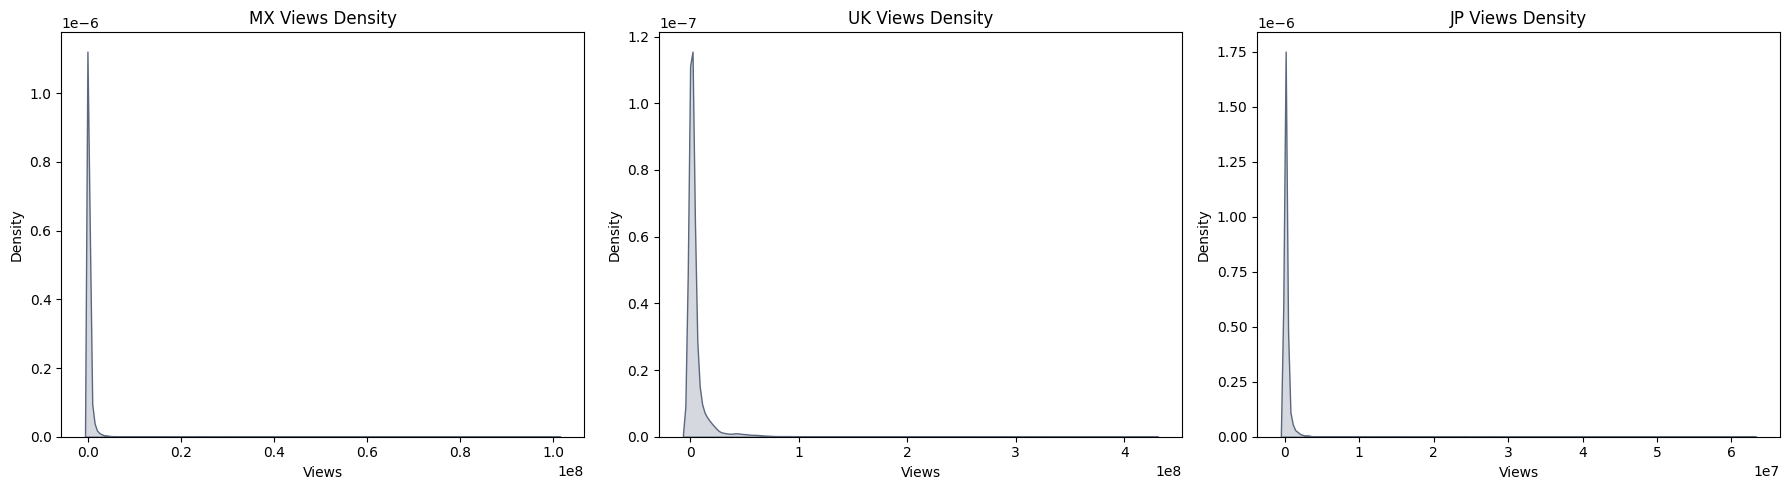

In [ ]:
# Veamos las densidades
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (region, views) in zip(axes, views_data.items()):
    sns.kdeplot(views, ax=ax, fill=True, color='#5A677D') # Kernel Density Estimate: un histograma suavizada
    ax.set_title(f"{region} Views Density")
    ax.set_xlabel("Views")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

In [ ]:
# Revisemos kurtosis
for region, views in views_data.items():
    k = kurtosis(views, fisher=True, bias=False)  # Fisher=True gives excess kurtosis
    print(f"{region} Views Kurtosis: {k:.3f}")

MX Views Kurtosis: 812.914
UK Views Kurtosis: 115.412
JP Views Kurtosis: 1182.716


In [159]:
def hill_estimator(exceedances):
    """
    Hill estimator for the extreme value index (EVI)
    exceedances: array of values above threshold
    """
    n = len(exceedances)
    sorted_exc = np.sort(exceedances)[::-1]  # descending order

    # Standard Hill formula
    logs = np.log(sorted_exc / sorted_exc[-1])  # log(x_i / x_k)

    gamma = np.mean(logs)
    
    return gamma

evi_results = {}

for region, views in views_data.items():
    # Choose threshold (99th percentile)
    threshold = np.percentile(views, 99)
    
    # Get exceedances above threshold
    exceedances = views[views > threshold]
    
    # Calculate EVI using Hill estimator
    gamma = hill_estimator(exceedances)
    evi_results[region] = gamma

for region, gamma in evi_results.items():
    print(f"{region} EVI (POT): {gamma:.4f}")


MX EVI (POT): 0.7627
UK EVI (POT): 0.5333
JP EVI (POT): 0.6925


In [157]:
# Expected shortfall
es_results = {}

for region, views in views_data.items():
    # Calculate 99th percentile (VaR)
    var_99 = np.percentile(views, 99)
    
    # Get exceedances above 99th percentile
    exceedances = views[views > var_99]
    
    # Calculate Expected Shortfall (average of exceedances)
    es = exceedances.mean()
    es_results[region] = es

for region, es in es_results.items():
    print(f"{region} Expected Shortfall (99th percentile): {es:.2f}")

MX Expected Shortfall (99th percentile): 12109331.14
UK Expected Shortfall (99th percentile): 151374326.72
JP Expected Shortfall (99th percentile): 8237904.58


In [160]:
# Initialize a dictionary to store all results
results = {}

for region, views in views_data.items():
    results[region] = {
        "Kurtosis": kurtosis(views, fisher=True, bias=False),
        "EVI (POT)": evi_results.get(region, None),
        "Expected Shortfall (99%)": es_results.get(region, None)
    }

# Convert to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df[["Kurtosis", "EVI (POT)", "Expected Shortfall (99%)"]]

# Display
print(results_df)

       Kurtosis  EVI (POT)  Expected Shortfall (99%)
MX   812.914440   0.762650              1.210933e+07
UK   115.411991   0.533288              1.513743e+08
JP  1182.715625   0.692482              8.237905e+06


**En resumen:** La curtosis indica la presencia de valores atípicos en toda la distribución, mientras que el índice de valor extremo (EVI) mide específicamente qué tan pesada es la cola de los eventos extremos.


Datos: https://www.kaggle.com/datasets/datasnaek/youtube-new